<a href="https://colab.research.google.com/github/underthelights/A.I./blob/main/cs229/PE2.%20Logistic_Regression_(Exercises).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Stanford CS229 - Machine Learning by Andrew Ng. Programming exercise 2 with solutions.

Please check out [the repository on GitHub](https://github.com/rickwierenga/CS229-Python/). If you spot any mistakes or inconcistencies, please create an issue. For questions you can find me on Twitter: [@rickwierenga](https://twitter.com/rickwierenga). Starring the project on GitHub means a ton to me!

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Logistic Regression

---
Logistic regression is predicting in which category a given data point is. In binary classifiction, there are only two categories:

$$y \in \{0,1\}$$

In this exercise, you will implement logistic regression and apply it to two different datasets. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

In [13]:
from google.colab import drive 
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
# start by loading the data
data = pd.read_csv("/content/gdrive/MyDrive/(2020~2022) 🔥/study_lectures /🤗/Open Course /Stanford/cs229_ML/ex2/ex2data1.txt", header = None,  names = ["Exam 1 Score", "Exam 2 Score", "Accepted"])

# initialize some useful variables
m = len(data["Accepted"])
x0 = np.ones(m)
size = np.array((data["Exam 1 Score"]))
bedrooms = np.array((data["Exam 2 Score"]))
X = np.array([x0, size, bedrooms]).T
y = np.array(data["Accepted"]).reshape((m,1))
m, n = X.shape

X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

### Visualising the data
A blue cross means accepted. A yellow oval means rejected.

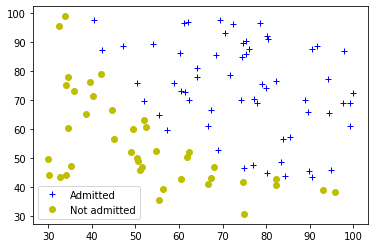

In [15]:
# Find indices of positive and negative examples
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot examples
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
plt.legend()
plt.show()

### Sigmoid
The sigmoid function, or logistic function, is a function that asymptotes at 0 and 1. The value at 0 is $\frac{1}{2}$.

$h_\theta(x) = g(\theta^Tx) = g(z) = \frac{1}{1+ e^{-z}} = \frac{1}{1+ e^{-\theta^Tx}}$

A plot of the sigmoid function:
![sigmoid](notes/sigmoid.png)

We are going to use the sigmoid function to predict how likely it is that a given data point is in category 0. Our hypothesis:

$h_\theta(x) = P(y = 0|x;\theta)$

Because there are only two categories (in this case), we can derrive that:

$P(y = 0|x;\theta) + P(y = 1|x;\theta)= 1$

**Exercise**: Implement the sigmoid function in Python.

In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Compute the Cost and Gradient

#### The cost function

The cost function in logistic regression differs from the one used in linear regression. The cost function in logistic regression:

$$J(\theta) = - \begin{bmatrix}\frac{1}{m}\displaystyle\sum_{i=1}^{m}-y^{(i)}\log h(x^{(i)}-(1-y^{(i)})\log(1-h_\theta(x^{(i)}))\end{bmatrix}$$

Assume our hypothesis for an example is wrong, the higher probability $h_\theta$ had predicted, the higher the penatly.

A vectorized version of the cost function:

$$J(\theta) = \frac{1}{m} ⋅(−y^T \log(h)−(1−y)^T \log(1−h))$$

**Exercise**: Implement the vectorized cost function in Python.

In [17]:
def compute_cost(theta, X, y):
    m = len(y)
    return (1/m) * (-y @ np.log(sigmoid(X@theta)) - (1-y) @ np.log(1-sigmoid(X@theta)) )

#### The gradient

The gradient is the step a minimization algorithm, like gradient descent, takes to get to the (local) minimum. Note that this step can be taken in a higher dimension and hence the gradient is a vector. In the previous programming exercise we used gradient descent. This time, we are going to use an algorithm called conjugate gradient to find the minimum. How that algorithm works is beyond the scope if this course. If you are interested, you can learn more about it [here](https://en.wikipedia.org/wiki/Conjugate_gradient_method).

The partial derrivative or $J(\theta)$:

$$\frac{\delta}{\delta\theta_J} = \frac{1}{m}\displaystyle\sum_{i = 1}^{m} \begin{bmatrix}(h_\theta(x^{(i)}) - y^{(i)}\end{bmatrix}x_j^{(i)}$$

Vectorized:

$$\frac{\delta}{\delta\theta_J} = \frac{1}{m} \cdot X^T \cdot (g(X\cdot\theta)-\vec{y})$$

**Exercise**: Write a function to compute the gradient.

In [18]:
def compute_gradient(theta, X, y):
    m = len(y)
    n = len(theta)
    gradient = (1 / m) * X.T @ (sigmoid(X@theta) - y)
    return gradient.reshape((n,))

Test the cost and gradient function. We expect $J \approx 0.693$ and $\frac{\delta}{\delta\theta_J} \approx \begin{bmatrix}-0.1000 & -12.0092 & -11.2628 \end{bmatrix}$

In [19]:
initial_theta = np.zeros(n)
y = y.reshape(m)
print('Cost: \n{}\n'.format(compute_cost(initial_theta, X, y)))
print('Gradient: \n{}'.format(compute_gradient(initial_theta, X, y)))

Cost: 
0.6931471805599453

Gradient: 
[ -0.1        -12.00921659 -11.26284221]


### Learning $\theta$ using conjugate gradient

The optimization library we are going to use is `scipy.optimize`. We have to provide the algorithm with our cost function, initial guess, gradient among with some other (optional) configuration options.

Please scan [the docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) of `minimize` first.

In [20]:
from scipy.optimize import minimize
result = minimize(compute_cost, initial_theta, args = (X, y),
                   method = 'CG', jac = compute_gradient, 
                   options = {"maxiter": 400, "disp" : 1})
theta = result.x
print('Conjugate gradient found the following values for theta: {}'.format(theta))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 58
         Function evaluations: 134
         Gradient evaluations: 134
Conjugate gradient found the following values for theta: [-25.15806605   0.20620558   0.20144516]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in matmul
  This is separate from the ipykernel package so we can avoid doing imports until


### The decision boundary
The decision boundary is a line (in case of a 2d plane) that seperates the area where we predict $y=1$ and $y=0$.

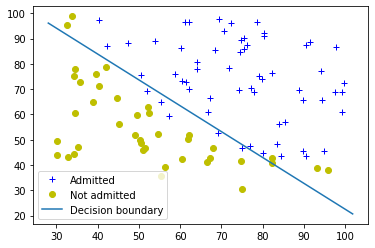

In [21]:
# Find indices of positive and negative examples
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot examples
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
plt.legend()

# Plot the decision boundary
plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
plot_y = (-1./theta[2]) * ((theta[1] * (plot_x) + theta[0]))

plt.plot(plot_x, plot_y, label='Decision boundary')

# Legend, specific for the exercise
plt.legend()

### Evaluation
#### Probability that a given student will be admitted

In [22]:
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:.2}'.format(prob))

For a student with scores 45 and 85, we predict an admission probability of 0.78


#### Accuracy
It's often a good idea to see how well your model trained. You can do that by checking how much datapoints we can predict correctly using $\theta$. In a real world application, you should consider splitting your data (eg 80% - 20%) and test on data the model has not seen before. This gives you more realistic insight in how your model would perform in the real world - and that's your ultimate goal ;)

In this example, we expect a training accuracy of 89.0%.

In [23]:
p = np.zeros((m, 1))
for (i, example) in enumerate(X):
    prob = sigmoid(np.array(example.dot(theta)))
    if prob >= 0.5:
        p[i] = 1
    else:
        p[i] = 0
print('Training Accuracy: {}%'.format(np.mean(p == y.reshape((m, 1))) * 100))

Training Accuracy: 89.0%


## Regularized linear regression

---
Regularization is a meganism for preventing overfitting. _Overfitting_ means that our model works extremely well on the training set but bad in the real world. It's focussed on the training data. _Underfitting_ is either a not well trained model or the feature mapping is not done (correctly). We will use regularization in this exercise. Furtermore, we are going to look at a more complex decision boundary

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assur- ance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [26]:
# start by loading the data
data = pd.read_csv("/content/gdrive/MyDrive/(2020~2022) 🔥/study_lectures /🤗/Open Course /Stanford/cs229_ML/ex2/ex2data2.txt", header = None, names = ["Test 1", "Test 2", "Status"])

# initialize some useful variables
m = len(data["Status"])
size = np.array((data["Test 1"]))
bedrooms = np.array((data["Test 2"]))
X = np.array([size, bedrooms]).T # don't add a column of ones yet.
y = np.array(data["Status"])

X[:5]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

### Visualising the data

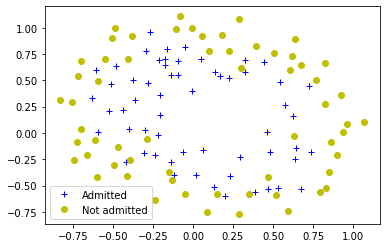

In [27]:
# Find indices of positive and negative examples
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot examples
plt.plot(X[pos, 0], X[pos, 1], 'b+', label='Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'yo', label='Not admitted')
plt.legend()
plt.show()

### Feature Mapping

One way to fit the data better is to create more features from each data point. While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. This will also add $x_0$.

In [28]:
def map_feature(X1, X2, degree):
    if not type(X1) == np.ndarray:
        X1 = np.array([X1])

    if not type(X2) == np.ndarray:
        X2 = np.array([X2])

    assert X1.shape == X2.shape
    
    out = np.ones((len(X1), 1))
    for i in range(1, degree+1):
        for j in range(i + 1):
            new = (X1 ** (i-j) * X2 ** j).reshape(len(X1), 1)
            out = np.hstack((out, new))
    return out

X = map_feature(X[:,0], X[:,1], degree=6)
m, n = X.shape

### Computing Cost and Gradient
#### Cost function
Regularization works by penalizing theta. Theta values can be high when an overfit occurs so we prefer to keep them low. $\lambda$ is the regularization parameter. If $\lambda=0$, no regularization happens. If $\lambda$ is some big number, $\theta$ has a very high penalty. Just like the learning rate $\alpha$ you have to try out certain values and see which work.

The cost function with regularization:

$$J(\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}-\begin{bmatrix}y^{(i)}\log h(x^{(i)}+(1-y^{(i)}\log(1-h_\theta(x^{(i)})) \end{bmatrix} + \frac{\lambda}{m}\displaystyle\sum_{j=1}^{n}{\theta_j}^2$$

**Exercise**: Implement the regularized cost function.

In [44]:
def compute_regularized_cost(theta, X, y, _lambda):
    m = len(y)

    regularization = _lambda / (2 * m) * np.sum(theta[1:] ** 2) #np.squared()???/
    cost = 1/m * (-y @ np.log(sigmoid(X @ theta)) - (1 - y) @ np.log(1 - sigmoid(X@theta)))
    return cost + regularization
    # return 1/m * (-y@np.log(sigmoid(X@theta)) - (1-y)@np.log(1-sigmoid(X@theta))) + _lambda/m * np,sum(theta[1:]**2)


#### Gradient descent
Gradient descent, just like the cost function, is slightly modified for regularization.

For $\theta_{j}$ where $j = 0$: 

$$\theta_j := \theta_j -\alpha \begin{bmatrix}\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)}){x_0}^{(i)}\end{bmatrix}$$

For $\theta_{j}$ where $j \in \{1, 2, ..., n\} $: 

$$\theta_j := \theta_j -\alpha \begin{bmatrix}\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}{\theta_j} \end{bmatrix}$$

Note that we don't penalize our bias vector $X_1$.

**Exercise**: Implement `compute_regularized_gradient`.

In [42]:
def compute_regularized_gradient(theta, X, y, _lambda):
    m = len(y)
    n = len(theta)
    gradient = np.ones(n)
    hx = sigmoid(X @ theta)
    gradient = (1 / m) * X.T @ (hx - y)
    regularization = (_lambda / m) * theta
    regularization[0] = 0
        
    return gradient + regularization

We expect: $J \approx 0.693$ and the first five values of $\theta$: $\begin{bmatrix} 0.0085 && 0.0188 && 0.0001 && 0.0503 && 0.0115 \end{bmatrix}$

In [45]:
_lambda = 1
initial_theta = np.ones(n)

cost = compute_regularized_cost(initial_theta, X, y, _lambda)
grad = compute_regularized_gradient(initial_theta, X, y, _lambda)

print('Cost at initial theta (zeros): {:.3}'.format(cost))
print('Gradient at initial theta (zeros) - first five values only: \n{}'.format(grad[:5]))

Cost at initial theta (zeros): 2.13
Gradient at initial theta (zeros) - first five values only: 
[0.34604507 0.08508073 0.11852457 0.1505916  0.01591449]


Find an optimimal value for theta using conjugate gradient.

In [46]:
from scipy.optimize import minimize
result = minimize(compute_regularized_cost, initial_theta, args = (X, y, _lambda),
                  method = 'CG', jac = compute_regularized_gradient, 
                  options = {"maxiter": 400, "disp" : 1})
theta = result.x
print('Conjugate gradient found the following values for theta - first five values only: {}'.format(theta[:5]))

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 28
         Function evaluations: 76
         Gradient evaluations: 76
Conjugate gradient found the following values for theta - first five values only: [ 1.27278161  0.62533884  1.18105652 -2.02009622 -0.91762257]


### Plotting the decision boundary
We can plot a more complex decision boundary using `np.linspace` and `contour`.

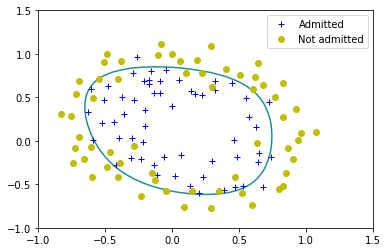

In [47]:
# Find indices of positive and negative examples
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot examples
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
plt.legend()

# Here is the grid range
u = np.linspace(-1, 1.5, 50).reshape(50)
v = np.linspace(-1, 1.5, 50).reshape(50)
z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = map_feature(u[i], v[j], degree=6).dot(theta)

# Plot z = 0
# Notice you need to specify the range [0, 0]
#z = z.reshape(len(u), len(v))
plt.contour(u, v, z.T, 0)

### Exploring regularization
As mentioned before, $\lambda$ is used to control the problem of overfitting. In the following graphs, models trained with different values of lambda are shown to give you some intuition on the problem of over/underfitting.

In [48]:
def create_plot_for_lambda(X, y, _lambda):
    from scipy.optimize import minimize
    result = minimize(compute_regularized_cost, initial_theta, args = (X, y, _lambda),
                      method = 'CG', jac = compute_regularized_gradient, 
                      options = {"maxiter": 400, "disp" : 1})
    theta = result.x
    print('Conjugate gradient found the following values for theta - first five values only: {}'.format(theta[:5]))

    # Find indices of positive and negative examples
    pos = np.where(y==1)[0]
    neg = np.where(y==0)[0]

    # Plot examples
    plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
    plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
    plt.legend()

    # Here is the grid range
    u = np.linspace(-1, 1.5, 50).reshape(50)
    v = np.linspace(-1, 1.5, 50).reshape(50)
    z = np.zeros((len(u), len(v)))

    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = map_feature(u[i], v[j], degree=6).dot(theta)

    # Plot z = 0
    # Notice you need to specify the range [0, 0]
    #z = z.reshape(len(u), len(v))
    plt.contour(u, v, z.T, 0)

#### Overfitting
Remember: overfitting means the model probably only works on the training set and not well in the real world. If you model is overfit, consider adding regularization or choosing a higher value for $\lambda$.

You can check out other values of $\lambda$ yourself.

         Current function value: 0.280906
         Iterations: 400
         Function evaluations: 1452
         Gradient evaluations: 1452
Conjugate gradient found the following values for theta - first five values only: [ 2.53698102 -1.36823912  2.14168677 -7.32650661 -8.48460541]


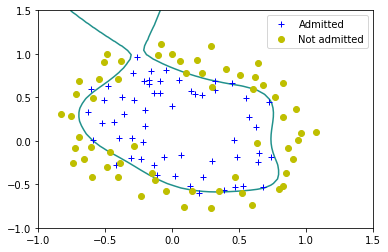

In [49]:
create_plot_for_lambda(X, y, 0)

#### Underfitting
Underfitting means the model is not well trained. Having a high $\lambda$ can cause underfitting.

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29
Conjugate gradient found the following values for theta - first five values only: [ 0.326144   -0.00815789  0.16580133 -0.44666092 -0.11177511]


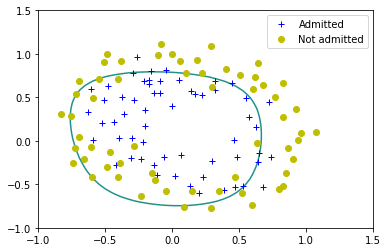

In [50]:
create_plot_for_lambda(X, y, 10)

#### Underfitting$^2$
This is what model trained with an extremely high value of $\lambda$ looks like:

Optimization terminated successfully.
         Current function value: 0.687913
         Iterations: 10
         Function evaluations: 23
         Gradient evaluations: 23
Conjugate gradient found the following values for theta - first five values only: [ 0.00980668 -0.01412537  0.00377853 -0.042739   -0.01022205]


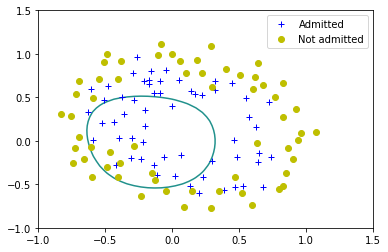

In [51]:
create_plot_for_lambda(X, y, 130)

### Adjusted normal equation
As you would have expected, the normal equation changes when you add normalization to your machine learning model. The adjusted version of the normal equation: 

$$\theta=(X^TX+\lambda\begin{bmatrix} 0&\dotsi&\dotsi&\dotsi &0\\\vdots &1&0& 0 & \vdots&\\\vdots&0&1 &0 & \vdots\\\vdots&0&0&1&\vdots\\0&\dotsi&\dotsi&\dotsi&1 \end{bmatrix})^{-1}X^Ty$$

If $m < n$, $X$ is [non-invertable](https://www.quora.com/What-is-a-non-invertible-matrix-What-are-some-examples).

In [52]:
L = np.eye(n)
L[0] = 0
_lambda = 1
theta = np.linalg.inv(X.T @ X + _lambda * L)@X.T@y
theta

array([ 0.94416708,  0.2315894 ,  0.41142826, -0.7380916 , -0.50116657,
       -0.69193639,  0.1003575 , -0.10718673, -0.06667559, -0.05556887,
       -0.45471969,  0.09321721, -0.23956536, -0.07088082, -0.40279421,
        0.04618662, -0.01432296,  0.04153635, -0.10356044, -0.02654812,
        0.05619122, -0.18296629,  0.12363998, -0.11445861,  0.06788982,
       -0.10602358,  0.04149463, -0.05781815])